# Step 1: k-fold cross-validation for neural network

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
dataset = load_breast_cancer()

In [4]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
t = dataset.target
x = dataset.data

In [8]:
x.shape, t.shape

((569, 30), (569,))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train_val, x_test, t_train_val, t_test = train_test_split(x,t,test_size=0.2,random_state=1)

In [36]:
print(x_train_val.shape[0])
print(x_test.shape[0])
print(len(t_train_val))
print(len(t_test))

print(114/(114+455))
print(x_test.shape[0]/(x_test.shape[0]+x_train_val.shape[0]))
print(len(t_test)/(len(t_train_val)+len(t_test)))

455
114
455
114
0.20035149384885764
0.20035149384885764
0.20035149384885764


In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
nn = MLPClassifier(random_state=0)

In [39]:
nn.fit(x_train_val,t_train_val)

MLPClassifier(random_state=0)

In [40]:
print(f'train score: {nn.score(x_train_val,t_train_val)}')
print(f'test score: {nn.score(x_test,t_test)}')

train score: 0.9318681318681319
test score: 0.9122807017543859


In [41]:
nn = MLPClassifier(random_state=0,activation='tanh')
nn.fit(x_train_val,t_train_val)

/Users/shohei/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', random_state=0)

In [42]:
print(f'train score: {nn.score(x_train_val,t_train_val)}')
print(f'test score: {nn.score(x_test,t_test)}')

train score: 0.9472527472527472
test score: 0.956140350877193


# Step 2: Hyperparameter tuning using grid search

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
estimator = MLPClassifier(random_state=0)

In [56]:
param_grid = [{
              'hidden_layer_sizes': [(100,),(110,),(120,),(150,),(200,)], 
              'solver': ['lbfgs'],
              'activation': ['relu','tanh'],
              'learning_rate_init': [0.1,0.01]
}]

In [57]:
cv = 5

In [58]:
tuned_model = GridSearchCV(estimator=estimator,
                          param_grid=param_grid,
                          cv=cv)

In [59]:
%time tuned_model.fit(x_train_val,t_train_val)

/Users/shohei/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/shohei/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/shohei/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarni

CPU times: user 3min 41s, sys: 1min 5s, total: 4min 46s
Wall time: 37.2 s


/Users/shohei/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=0),
             param_grid=[{'activation': ['relu', 'tanh'],
                          'hidden_layer_sizes': [(100,), (110,), (120,), (150,),
                                                 (200,)],
                          'learning_rate_init': [0.1, 0.01],
                          'solver': ['lbfgs']}])

In [ ]:
tuned_model.cv_results_

In [60]:
pd.DataFrame(tuned_model.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
mean_fit_time,0.300559,0.299843,0.274009,0.264832,0.313087,0.305179,0.373875,0.367819,0.422869,0.419249,0.338218,0.334491,0.354137,0.361213,0.352299,0.350278,0.415212,0.445725,0.520044,0.515741
std_fit_time,0.025078,0.026022,0.107848,0.101732,0.040901,0.038712,0.042864,0.039893,0.08731,0.08577,0.023004,0.019304,0.013295,0.01095,0.02562,0.006287,0.028584,0.017378,0.011897,0.017425
mean_score_time,0.000829,0.000894,0.000848,0.000867,0.000789,0.000747,0.000746,0.000725,0.000763,0.000917,0.000991,0.00092,0.00092,0.001013,0.000891,0.000976,0.000979,0.001109,0.001061,0.00096
std_score_time,0.000143,0.000234,0.000144,0.000271,0.000175,0.000158,0.000158,0.000168,0.000117,0.000142,0.000164,0.000144,0.000157,0.000042,0.000078,0.000121,0.00011,0.000169,0.000077,0.000093
param_activation,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh
param_hidden_layer_sizes,"(100,)","(100,)","(110,)","(110,)","(120,)","(120,)","(150,)","(150,)","(200,)","(200,)","(100,)","(100,)","(110,)","(110,)","(120,)","(120,)","(150,)","(150,)","(200,)","(200,)"
param_learning_rate_init,0.1,0.01,0.1,0.01,0.1,0.01,0.1,0.01,0.1,0.01,0.1,0.01,0.1,0.01,0.1,0.01,0.1,0.01,0.1,0.01
param_solver,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs
params,"{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (..."
split0_test_score,0.923077,0.923077,0.923077,0.923077,0.912088,0.912088,0.934066,0.934066,0.901099,0.901099,0.901099,0.901099,0.879121,0.879121,0.912088,0.912088,0.912088,0.912088,0.879121,0.879121


In [61]:
pd.DataFrame(tuned_model.cv_results_).sort_values('mean_test_score',ascending=False).T

,6,7,0,1,4,5,8,9,2,3,14,15,17,16,10,11,13,12,18,19
mean_fit_time,0.373875,0.367819,0.300559,0.299843,0.313087,0.305179,0.422869,0.419249,0.274009,0.264832,0.352299,0.350278,0.445725,0.415212,0.338218,0.334491,0.361213,0.354137,0.520044,0.515741
std_fit_time,0.042864,0.039893,0.025078,0.026022,0.040901,0.038712,0.08731,0.08577,0.107848,0.101732,0.02562,0.006287,0.017378,0.028584,0.023004,0.019304,0.01095,0.013295,0.011897,0.017425
mean_score_time,0.000746,0.000725,0.000829,0.000894,0.000789,0.000747,0.000763,0.000917,0.000848,0.000867,0.000891,0.000976,0.001109,0.000979,0.000991,0.00092,0.001013,0.00092,0.001061,0.00096
std_score_time,0.000158,0.000168,0.000143,0.000234,0.000175,0.000158,0.000117,0.000142,0.000144,0.000271,0.000078,0.000121,0.000169,0.00011,0.000164,0.000144,0.000042,0.000157,0.000077,0.000093
param_activation,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh
param_hidden_layer_sizes,"(150,)","(150,)","(100,)","(100,)","(120,)","(120,)","(200,)","(200,)","(110,)","(110,)","(120,)","(120,)","(150,)","(150,)","(100,)","(100,)","(110,)","(110,)","(200,)","(200,)"
param_learning_rate_init,0.1,0.01,0.1,0.01,0.1,0.01,0.1,0.01,0.1,0.01,0.1,0.01,0.01,0.1,0.1,0.01,0.01,0.1,0.1,0.01
param_solver,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs
params,"{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'relu', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (...","{'activation': 'tanh', 'hidden_layer_sizes': (..."
split0_test_score,0.934066,0.934066,0.923077,0.923077,0.912088,0.912088,0.901099,0.901099,0.923077,0.923077,0.912088,0.912088,0.912088,0.912088,0.901099,0.901099,0.879121,0.879121,0.879121,0.879121


In [62]:
tuned_model.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (150,),
 'learning_rate_init': 0.1,
 'solver': 'lbfgs'}

In [54]:
best_model = tuned_model.best_estimator_
best_model

MLPClassifier(hidden_layer_sizes=(150,), learning_rate_init=0.1, random_state=0,
              solver='lbfgs')

In [55]:
print(best_model.score(x_train_val, t_train_val))
print(best_model.score(x_test, t_test))

0.9538461538461539
0.9473684210526315


In [63]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = [{
              'hidden_layer_sizes': [(100,),(110,),(120,),(150,),(200,)], 
              'solver': ['lbfgs'],
              'activation': ['relu','tanh'],
              'learning_rate_init': [0.1,0.01]
}]
tuned_model = RandomizedSearchCV(estimator=estimator,
                          param_distributions=param_grid,
                          cv=cv)
%time tuned_model.fit(x_train_val,t_train_val)

/Users/shohei/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/shohei/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/shohei/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarni

CPU times: user 2min 2s, sys: 38.7 s, total: 2min 41s
Wall time: 21 s


/Users/shohei/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RandomizedSearchCV(cv=5, estimator=MLPClassifier(random_state=0),
                   param_distributions=[{'activation': ['relu', 'tanh'],
                                         'hidden_layer_sizes': [(100,), (110,),
                                                                (120,), (150,),
                                                                (200,)],
                                         'learning_rate_init': [0.1, 0.01],
                                         'solver': ['lbfgs']}])

In [ ]:
print(tuned_model.best_params_)
best_model = tuned_model.best_estimator_
print(best_model.score(x_train_val, t_train_val))
print(best_model.score(x_test, t_test))

In [ ]:
%%script false 
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.base import BaseEstimator, ClassifierMixin

class MLPWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, layer1=10,):
        self.layer1 = layer1

    def fit(self, X, y):
        model = MLPClassifier(
            hidden_layer_sizes=[self.layer1, ],
            random_state=0
        )
        model.fit(X, y)
        self.model = model
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        return self.model.score(X, y)

tuned_model = BayesSearchCV(
    estimator=MLPWrapper(),
    search_spaces={
        'layer1': Integer(10, 200),
    },
    cv=cv
)

%time tuned_model.fit(x_train_val,t_train_val)

In [64]:
print(tuned_model.best_params_)
best_model = tuned_model.best_estimator_
print(best_model.score(x_train_val, t_train_val))
print(best_model.score(x_test, t_test))

{'solver': 'lbfgs', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (150,), 'activation': 'relu'}
0.9538461538461539
0.9473684210526315


In [ ]:
params=[{
  'hidden_layer_sizes': [(x,) for x in np.arange(10,210,10)]
}]
    
tuned_model = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=params,
    cv=cv
)

%time tuned_model.fit(x_train_val,t_train_val)

In [ ]:
print(tuned_model.best_params_)
best_model = tuned_model.best_estimator_
print(best_model.score(x_train_val, t_train_val))
print(best_model.score(x_test, t_test))

# Step 3: Performance indicators

In [65]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [68]:
t_pred = best_model.predict(x_test)
print(t_pred) # prediction
print(t_test) # label

[1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1]
[1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1]


In [69]:
confusion_matrix(t_test,t_pred)

array([[37,  5],
       [ 1, 71]])

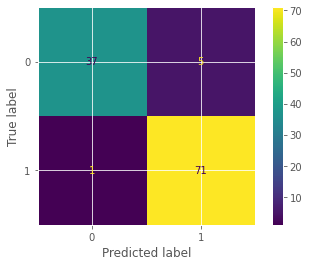

In [70]:
ConfusionMatrixDisplay.from_estimator(best_model, x_test, t_test)

In [71]:
accuracy = accuracy_score(t_test, t_pred)
print(f'accuracy: {accuracy}')
precision = precision_score(t_test, t_pred)
print(f'precision: {precision}')
recall = recall_score(t_test, t_pred)
print(f'recall: {recall}')
f1 = f1_score(t_test, t_pred)
print(f'f1 score: {f1}')

accuracy: 0.9473684210526315
precision: 0.9342105263157895
recall: 0.9861111111111112
f1 score: 0.9594594594594595
